# Домашнее задание № 4:

С использованием библиотек Numpy и Pandas написать программу реализующую:

1. Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2. Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3. Подсчет длин предложений и их количества.
4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5. Построение гистограммы частоты встречаемости слов.

Перед тем, как приступить к подсчету частоты встречаемости слов необходимо предварительно обработать текс, а именно: 
1) Удалить цифры, знаки пунктуации и лишние пробелы. Для это реализации данного пункта использована библиотека re.
2) Лемматизация; Для лемматизации(приведению слова к словарной форме — лемме) используется библиотека pymorphy2, поскольку текст на русском языке).
3) Удаление стоп слов; В качестве списка стоп слов выбраны спиок стоп слов библиотеки spacy, который в последствии расширен.

Количество уникальных слов в тексте: 1901.



<AxesSubplot:title={'center':'Частота встречаемости слов в тексте'}, xlabel='Слово', ylabel='Word'>

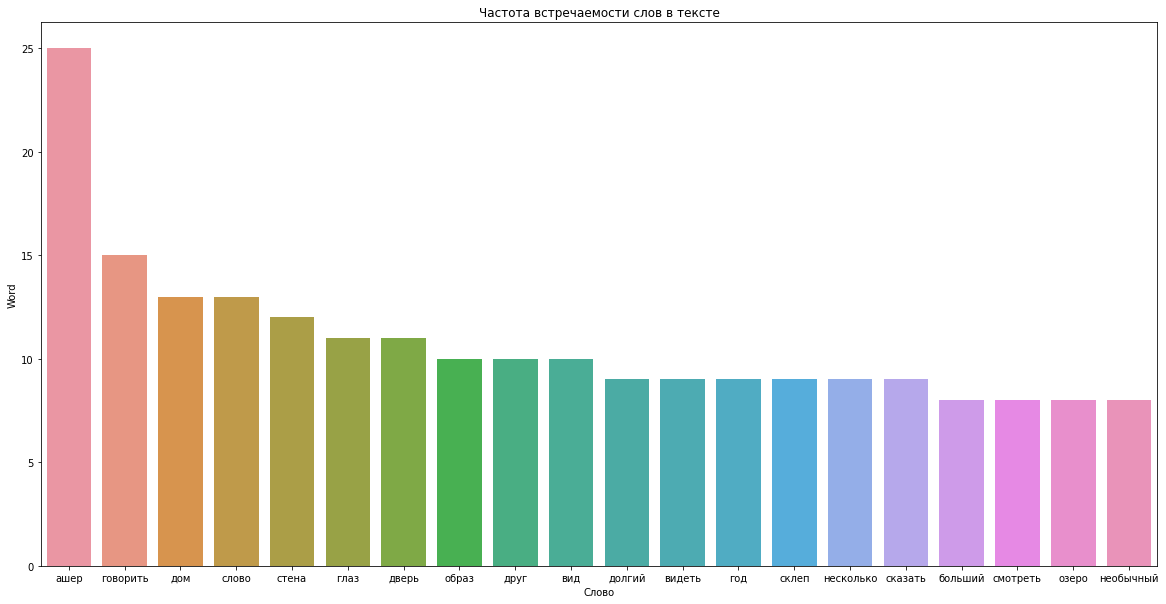

In [116]:
import numpy as np
import pandas as pd
import re

import pymorphy2
morph = pymorphy2.MorphAnalyzer() #добавление анализатора для морфологического анализа текста

from collections import Counter

import spacy 
from spacy.lang.ru import Russian
from spacy.lang.ru.stop_words import STOP_WORDS
nlp = spacy.load("ru_core_news_sm")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

SW = STOP_WORDS
SW |= {"ни", "ибо", "лишь", "хотя", "какой", "более", "много", "столь", "однако", "под", "подобный"}

most_common_words = 20  # Переменная для определения, частоту скольких первых слов отобразить на графике

def clean_data(str):
#убираем римские цифры
    str = re.sub('I', '', str)
    str = re.sub('V', '', str)
#начнем чистить файл от мусора(символы табудяции, переноса текста, знаки препинания и тд) 
#для подсчета частоты встречаемости слов
    clean_string = re.sub('[\d+\t\r\n{}()//.,!;?:«»[\]––-]', ' ', str)
#убираем лишние пробелы
    clean_string = " ".join(clean_string.split())
    clean_string = clean_string.lower()
    return clean_string


inp = open('Padenie_Doma_Asherov.txt')
book = inp.read() #оригинальный загруженный файл

clean_book = clean_data(book)#очищенные от лишнего мусора файл

list_of_clean_data = clean_book.split() #разбиваем строку на список для возможности преобразования слов в им. падеж

lemm_text = []

for item in list_of_clean_data:
        lemm_text.append(morph.parse(item)[0].normal_form) #лемматизация текста
        
lemm_text_without_sw= [word for word in lemm_text if not word in SW] #удаление стоп слов

count_words = Counter(lemm_text_without_sw)
print('Количество уникальных слов в тексте: '
      '{}.\n'.format(len(count_words)))

Word_Data=pd.DataFrame({"Word": lemm_text_without_sw})

mf = Word_Data['Word'].value_counts()
mf.head(20)

## настройки графика

plt.figure(figsize=(20,10))
plt.title("Частота встречаемости слов в тексте")
plt.ylabel("Число упоминаний")
plt.xlabel("Слово")

sns.barplot(x=mf.head(most_common_words).index, y=mf.head(most_common_words))

Перед посчетом предложений ориигнальный текст был предварительно очищен от знаков табуляции, исходя из предположения, что предложение может заканчиваться либо точкой, либо восклицательным или вопросительным знаками, последние были заменены в тексте на точки. 

In [111]:
inp = open('Padenie_Doma_Asherov.txt')
text = inp.read() #оригинальный загруженный файл
text = re.sub('[\t\r\n\xa0{}(),;//[\]––-]', ' ', text)
text = re.sub('I', '', text)
text = re.sub('V', '', text)
text = text.replace('?', '.')
text = text.replace('!', '.')
doc = nlp(text)
doc_sentences = list(doc.sents)
len(doc_sentences)

247

In [113]:
counter = pd.DataFrame(
            {'Предложение': b , 
             'длина предложенией': (list(map(len,b)))})
counter

,Предложение,длина предложенией
0,"(Son, coeur, est, un, luth, suspendu, , Sitt...",14
1,"( , De, Bеranger, 1, , Его, сердце, , ...",11
2,"( , Коснешься, , и, она, зазвучит, .)",7
3,"( , Де, Беранже, , франц, .)",6
4,"( , В, течение, всего, унылого, , темного, ...",43
...,...,...
242,"( , Охваченный, страхом, , бежал, я, из, того...",14
243,"(Гроза, еще, бушевала, во, всю, мочь, , когда...",18
244,"(Вдруг, ее, пронизал, жуткий, свет, , и, я, о...",28
245,"(Сияла, полная, , заходящая, , кроваво, крас...",39
